In [1]:
import sys
sys.path.append('../vysxd')
from vysxd_analysis import *
from vysxd_define import *
from transform import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as manimation
from scipy import *

In [2]:
## pull data

e_density = get_osiris_quantity_1d('data/MS/DENSITY/electrons/charge/')
e_density_0 = vysxd_get_data('data/MS/DENSITY/electrons/charge/charge-electrons-000000.h5')

i_density = get_osiris_quantity_1d('data/MS/DENSITY/ions/charge/')
i_density_0 = vysxd_get_data('data/MS/DENSITY/ions/charge/charge-ions-000000.h5')

e_ufl1 = get_osiris_quantity_1d('data/MS/UDIST/electrons/ufl1/')
e_ufl1_0 = vysxd_get_data('data/MS/UDIST/electrons/ufl1/ufl1-electrons-000000.h5')

i_ufl1 = get_osiris_quantity_1d('data/MS/UDIST/ions/ufl1/')
i_ufl1_0 = vysxd_get_data('data/MS/UDIST/ions/ufl1/ufl1-ions-000000.h5')

# Useful to keep these as global variables
dt, dx, t, x = e_density[1], e_density[2], e_density[3], e_density[4]

In [3]:
# write_quantities can be used to integrate shit and then leave it as .npy files that we can load very easily
# note that quantity_ indicates an averaged quantity... I don't know if there is a better practice

e_density_ = np.load("avg_q/e_density.npy")
i_density_ = np.load("avg_q/i_density.npy")

e_ufl1_ = np.load("avg_q/e_ufl1.npy")
# e_ufl2_ = np.load("avg_q/e_ufl2.npy")
# e_ufl3_ = np.load("avg_q/e_ufl3.npy")

i_ufl1_ = np.load("avg_q/i_ufl1.npy")

In [4]:
xmin = 5; xmax = 50; tmin = 300;tmax =399; v=.135; upstream_index = 450


In [17]:
# Remember, p1x1[0] has the shape [t of len 526, v of len 512, x of len 1024]
p1x1 = get_osiris_quantity_2d('data/MS/PHA/p1x1/electrons/')
t_phase = p1x1[4]
x_phase = p1x1[5]
v_phase = p1x1[6] 

fvsquared = lambda: np.square(np.swapaxes(np.array([[v_phase]*len(x_phase)]*len(t_phase)),-1,1))
fv = lambda: np.swapaxes(np.array([[v_phase]*len(x_phase)]*len(t_phase)),-1,1)

second_moment = np.trapz(np.multiply(fvsquared(),p1x1[0]),axis=1)
first_moment = np.trapz(np.multiply(fv(),p1x1[0]),axis=1)
zeroth_moment = np.trapz(p1x1[0],axis=1)
# sorry for the spaghetti code, if I do it any other way I will run out of memory
# basically all of this swapaxes shit is just for the purposes of creating a v matrix that is uniform in x and t, and the same size
# as p1x1

pressure = second_moment-2*np.multiply(e_ufl1[0],first_moment)+np.multiply(np.square(e_ufl1[0]),zeroth_moment)

print(np.shape(pressure))

# print(np.shape(wsquared))
print(np.shape(p1x1[0]))


(526, 1024)
(526, 512, 1024)


In [22]:
# Remember, p1x1[0] has the shape [t of len 526, v of len 512, x of len 1024]
p2x1 = get_osiris_quantity_2d('data/MS/PHA/p2x1/ions/')
t_phase = p2x1[4]
x_phase = p2x1[5]
v_phase = p2x1[6] 

# e_ufl1_transformed = np.swapaxes(np.array([-v+e_ufl1[0]]*len(v_phase)),0,1) # leave this commented to save RAM(?)
# print(np.shape(e_ufl1_transformed))

# v_phase_arr = np.swapaxes(np.array([[v_phase]*len(x_phase)]*len(t_phase)),-1,1) # leave this commented as well
# print(np.shape(v_phase_arr))

wsquared = np.square(np.swapaxes(np.array([[v_phase]*len(x_phase)]*len(t_phase)),-1,1))
print(np.shape(wsquared))
print(np.shape(p2x1[0]))


FileNotFoundError: [Errno 2] No such file or directory: 'data/MS/PHA/p2x1/electrons/'

In [8]:
result = np.multiply(wsquared,p1x1[0])
pressure = -1*np.trapz(result, axis = 1)
density = np.trapz(p1x1[0],axis=1)
print(np.shape(pressure))

(526, 1024)


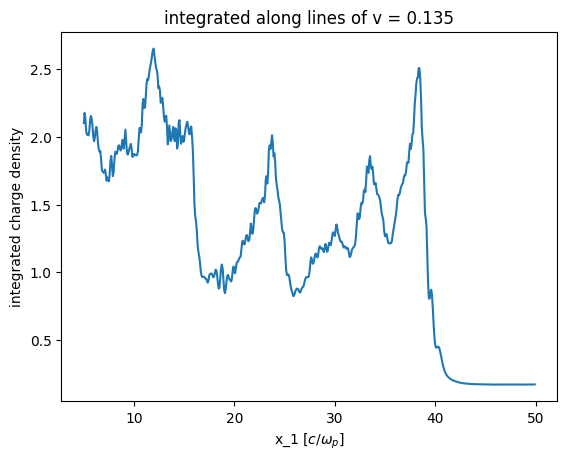

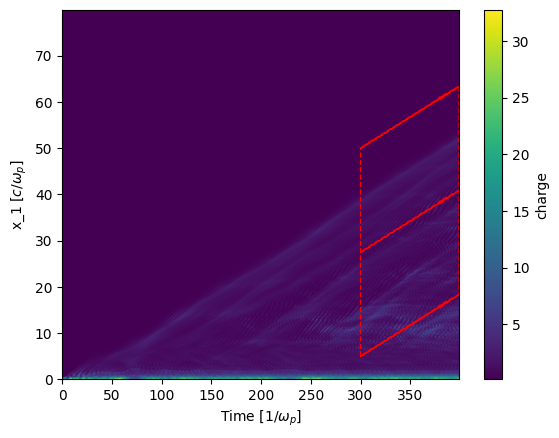

In [20]:
pressure_ = box_integrate([-pressure,dt, dx, t, x],tmin=tmin,tmax=tmax,xmin = xmin, xmax = xmax, v=v, q_0 = e_density_0)
# density_ = box_integrate([zeroth_moment,dt, dx, t, x],tmin=tmin,tmax=tmax,xmin = xmin, xmax = xmax, v=v, q_0 = e_density_0)
illustrate_box([-pressure,dt, dx, t, x],tmin=tmin,tmax=tmax,xmin = xmin, xmax = xmax, v=v, q_0 = e_density_0)

# illustrate_box([zeroth_moment,dt, dx, t, x],tmin=tmin,tmax=tmax,xmin = xmin, xmax = xmax, v=v, q_0 = e_density_0)